# Dalle Runtime Example

Ensure you have everything set up as per README.md.

## Run Server

> mlserver start docs/examples/.

## Send Request

In [118]:
import requests

data = {
    "inputs": [{
        "name": "text_inputs",
        "shape": [1],
        "datatype": "BYTES",
        "data": ["Freshly baked cookies"]
    }],
    "parameters": { "seed": 3 }
}
result = requests.post("http://localhost:8080/v2/models/transformer/infer", json=data)

In [119]:
import json

result_json = json.loads(result.json()["outputs"][0]["data"][0])
result_str = result_json[0][0]["generated_text"]

print(result_str)

Freshly baked cookies, then topped with creamy chocolate chips and a soft cream cheese sauce.


In [121]:
import requests

data = {
    "inputs": [{
        "name": "text_inputs",
        "shape": [1],
        "datatype": "BYTES",
        "data": [result_str]
    }],
    "parameters": { "seed": 3 }
}
result = requests.post("http://localhost:8080/v2/models/test-model/infer", json=data)

## Process Response

In [122]:
from mlserver.types import InferenceResponse

ir = InferenceResponse(**result.json())

## Decode Output

In [123]:
from mlserver.codecs import NumpyCodec

np_arr = NumpyCodec.decode_output(ir.outputs[0])

## Display Output

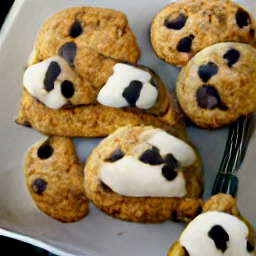

In [124]:
from PIL import Image

img_arr = Image.fromarray(np_arr, 'RGB')

display(img_arr)